<a href="https://colab.research.google.com/github/sinkerball/2023AI/blob/main/%5B%EC%8B%A4%EC%8A%B5_02%5D_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive


In [27]:
import numpy as np

import pandas as pd

drive.mount('/content/drive')

data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price.txt', names=['size', 'price'])
print (data)

X=data['size']
y=data['price']
m=len(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         size  price
0   27.575758   6.10
1   26.969697   3.80
2   36.969697   5.70
3   13.636364   1.80
4   56.969697  13.00
5   29.090909   6.20
6   80.303030  12.00
7   51.515152   9.00
8   34.848485   5.30
9   18.484848   1.70
10  30.909091   3.80
11  33.939394   5.80
12  26.060606   3.70
13  32.424242   8.50
14  32.121212   4.70
15  31.818182   4.70
16  30.909091   6.00
17  36.969697   5.00
18  32.424242   6.50
19  33.030303   6.50
20  27.575758   7.00
21  20.000000   2.70
22  25.454545   8.60
23  31.818182   6.20
24  32.424242   5.80
25  32.424242   8.19
26  28.484848   5.09
27  32.424242   8.00
28  37.272727   6.10
29  25.757576   5.90
30  23.333333   6.00
31  31.515152   7.20
32  33.333333   8.50
33  19.393939   3.90
34  33.030303   8.50
35  20.909091   2.50
36  33.636364   5.00
37  21.212121   2.35
38  30.606061   3.30
39  30.909091   4.50
40  29.393

In [28]:
X=(np.array(X)).reshape(m,1)
y=(np.array(y)).reshape(m,1)
print (X.shape, y.shape)

(52, 1) (52, 1)


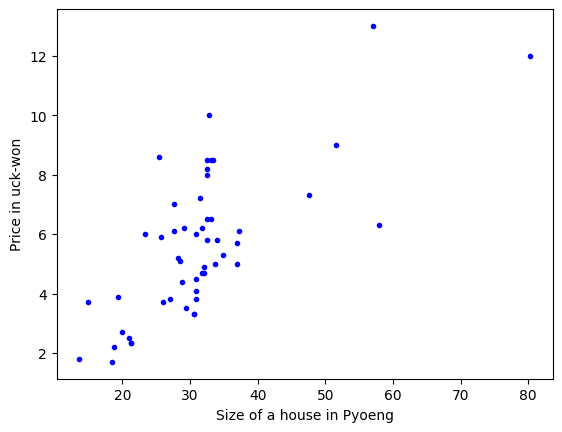

In [29]:
import matplotlib.pyplot as plt
plt.plot(X,y,'b.')
plt.xlabel("Size of a house in Pyoeng")
plt.ylabel("Price in uck-won")
plt.show()

In [30]:
X_b=np.c_[np.ones((m,1)),X]

learning_rate= 0.0001
n_iter= 200

theta =np.zeros((2,1))
gradients =np.zeros((2,1))

for i in range(n_iter):

  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta= theta - learning_rate* gradients

print ("theta:")
print (theta)

theta:
[[0.007878  ]
 [0.17556765]]


In [31]:
X_new =np.array([[10],[90]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta)
print("10평과 90평 집의 예측 가격")
print(y_predict)

10평과 90평 집의 예측 가격
[[ 1.76355445]
 [15.80896606]]


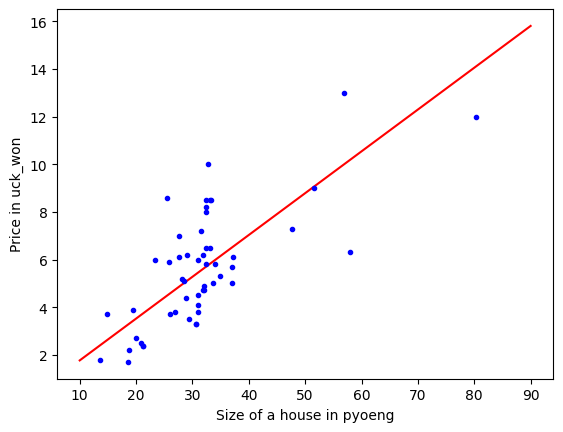

In [32]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.xlabel("Size of a house in pyoeng")
plt.ylabel("Price in uck_won")
plt.show()

In [33]:
X_mine=np.array([[25]])
X_mine_b= np.c_[np.ones((1,1)),X_mine]
y_predict = X_mine_b.dot(theta)
print( y_predict, "억원")

[[4.39706913]] 억원


In [49]:
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter=100, penalty=None, eta0=0.0001)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.0001, max_iter=100, penalty=None)

theta
[0.00665876] [0.17307725]


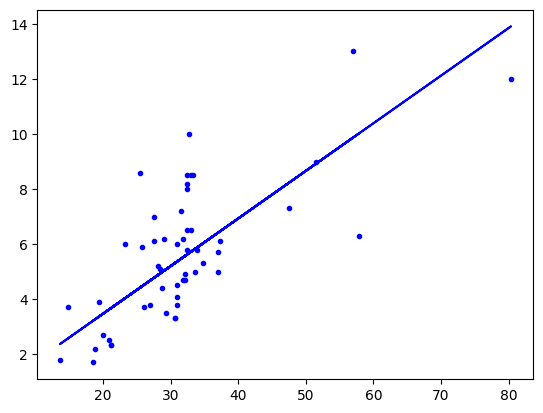

In [36]:
print ("theta")
print (sgd_reg.intercept_, sgd_reg.coef_)

y_pred= sgd_reg.predict(X)
plt.plot(X,y,'b.')
plt.plot(X,y_pred,'b')
plt.show()

In [37]:
y_pred=sgd_reg.predict([[25]])
print(y_pred,"억원")

[4.33358989] 억원


In [38]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def ComputeJ(t0, t1 , X,y):
  m= len(X)
  X_b =np.c_[np.ones((m,1)),X]
  theta= np.array([t0, t1])

  cost_vector = X_b.dot(theta)-y

  cost_vector = cost_vector.reshape(-1)

  cost2 =np.square(cost_vector)
  cost_sum = np.sum(cost2)/(2*m)

  return cost_sum

In [46]:
d= 100
s=1.0
theta0 = np.linspace(-15*s, 15*s, d)
theta1 = np.linspace(-1.0*s, 1.0*s, d)

J = np.ones((d,d))
for i,t0 in enumerate(theta0):
   for j,t1 in enumerate(theta1):
    cost = ComputeJ(t0,t1,X,y)
    J[i,j]=cost

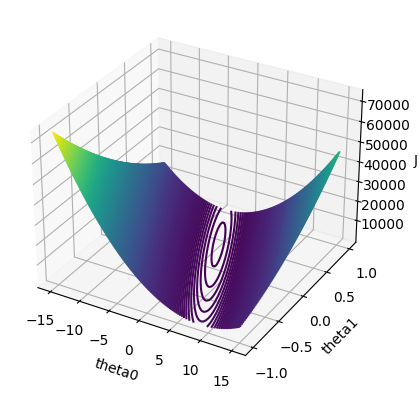

In [48]:
pX, py =np.meshgrid(theta0, theta1)

fig= plt.figure()
ax= plt.axes(projection='3d')
ax.contour3D(pX,py,J, 300, cmap='viridis')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J');
plt.show()